# IDEA:

Now we want to obtain 5 df, one for each user that we obtain from the cluster analysis 

this is the first step for build our NN, since we want to train the model with the song that each single User listen, and we want to predict the 'valence' (that is a evaluation of how much the song is liked to the user) based on the teste of the single user

In [1]:
# we recall our df after the clustering procedure
%store -r merge_unique_df

FIRST IMPLEMENTATION 

In [2]:
merge_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27207 entries, -twistin'-White Silver SandsBill Black's Combo to Zunga ZengK7
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Performer                      27207 non-null  object 
 1   Song                           27207 non-null  object 
 2   spotify_genre                  27207 non-null  object 
 3   spotify_track_duration_minute  27207 non-null  float64
 4   spotify_track_explicit         27207 non-null  object 
 5   spotify_track_album            27207 non-null  object 
 6   danceability                   27207 non-null  float64
 7   energy                         27207 non-null  float64
 8   key                            27207 non-null  float64
 9   loudness                       27207 non-null  float64
 10  mode                           27207 non-null  float64
 11  speechiness                    27207 non-null  float64
 12 

In [3]:
# i want to rename the column Cluster --> WILL BE OUR USER 
merge_unique_df.rename(columns={'cluster':'User'},inplace=True)
merge_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27207 entries, -twistin'-White Silver SandsBill Black's Combo to Zunga ZengK7
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Performer                      27207 non-null  object 
 1   Song                           27207 non-null  object 
 2   spotify_genre                  27207 non-null  object 
 3   spotify_track_duration_minute  27207 non-null  float64
 4   spotify_track_explicit         27207 non-null  object 
 5   spotify_track_album            27207 non-null  object 
 6   danceability                   27207 non-null  float64
 7   energy                         27207 non-null  float64
 8   key                            27207 non-null  float64
 9   loudness                       27207 non-null  float64
 10  mode                           27207 non-null  float64
 11  speechiness                    27207 non-null  float64
 12 

In [4]:
# to see wich feature consider in the model 
merge_unique_df.columns

Index(['Performer', 'Song', 'spotify_genre', 'spotify_track_duration_minute',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity', 'maingenere', 'User'],
      dtype='object')

In [5]:
merge_unique_df.shape

(27207, 21)

In [6]:
# to verify that we don't have Nan value after the marge
merge_unique_df.isnull().sum()

Performer                        0
Song                             0
spotify_genre                    0
spotify_track_duration_minute    0
spotify_track_explicit           0
spotify_track_album              0
danceability                     0
energy                           0
key                              0
loudness                         0
mode                             0
speechiness                      0
acousticness                     0
instrumentalness                 0
liveness                         0
valence                          0
tempo                            0
time_signature                   0
spotify_track_popularity         0
maingenere                       0
User                             0
dtype: int64

## Now we can try to develop our (first) NN

In [7]:
# package that we need
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError


# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# essential
import numpy as np
import matplotlib.pyplot as plt

#correlation
import seaborn as sns


#RICORDARE DA INSTALLARE PEDROLLO 
! pip install pydot

In [8]:
# fisrt we define the FEATURE of our model --> INPUT
feature=[    'spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness']
# now we have to define our TARGET (what we are interested in) --> OUTPUT
target='valence'

# we also define the USER, since we train the model dividing by users
user='User'

### USER 1 - Test


In [9]:
# first we have to obtain only the songs listen to the USER1
mask_user1=merge_unique_df['User']==1
user1_df=merge_unique_df[mask_user1]
user1_df.shape

(4669, 21)

In [10]:
user1_df.User.unique()

array([1])

In [11]:
# we obtain the user1 subset
user1_df.head(3)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",3.66,False,Radio Hits Of the '80s,0.647,0.686,2.0,-4.247,...,0.0274,0.4320,0.000006,0.1330,0.952,155.697,4.0,40.0,rock,1
'til I Can Make It On My OwnTammy Wynette,Tammy Wynette,'til I Can Make It On My Own,"['country', 'country dawn', 'nashville sound']",3.03,False,The Essential Tammy Wynette,0.450,0.294,7.0,-12.022,...,0.0318,0.8320,0.000035,0.1080,0.146,141.148,4.0,31.0,country,1
'Til My Baby Comes HomeLuther Vandross,Luther Vandross,'Til My Baby Comes Home,"['funk', 'motown', 'neo soul', 'new jack swing...",5.54,False,The Night I Fell In Love,0.804,0.714,11.0,-6.714,...,0.1830,0.0567,0.000006,0.0253,0.802,139.663,4.0,29.0,soul,1


In [12]:
#E SE TRASFORMASSIMO IL MAINGENERE IN UN NUMERO????? POTREBBE ESSERE UTILE PER CONSIGLIARE LE CANZONI?? (magari in un mese ascolta solo un genere quindi meglio consigliargli un genere simile)
print(user1_df['maingenere'].value_counts()) #check song recensite
mean_valence_maingenere = user1_df.groupby('maingenere')['valence'].mean() #check the mean for maingenere (the averege rank that the usere give to some type of songs)
display(mean_valence_maingenere)

maingenere
pop        1256
rock       1108
country     521
rap         520
other       483
soul        308
metal        69
disco        66
dance        65
folk         50
blues        48
jazz         43
funk         40
house        31
indie        24
r&b          23
latin        14
Name: count, dtype: int64


maingenere
blues      0.825375
country    0.496266
dance      0.601092
disco      0.648318
folk       0.602440
funk       0.601755
house      0.552652
indie      0.682583
jazz       0.603488
latin      0.709857
metal      0.374229
other      0.664371
pop        0.595602
r&b        0.533957
rap        0.460987
rock       0.631969
soul       0.655705
Name: valence, dtype: float64

Note:
in order to understand the property of our cluster, we check for wich is the mean vote for each maingenre:

we see that the user like a lot blues and don't like metal, this generes can be use to test the model 

(check if the model propose the song with this main genere)

In [13]:
# now we estract the FEATURE
x=user1_df[feature]
#x.columns

# and the TARGET
y=user1_df[target]
#y

In [14]:
# NORMALIZE OUR FEATURES

scaler=StandardScaler()

x_scaled=scaler.fit_transform(x)

In [15]:
# now we divide the df in test and train 
# necessary in order test our results after the application of the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [16]:
# for keras we need to convert y_train and y_test in Numpy array 
y_train=np.array(y_train)
y_test=np.array(y_test)

#before apply the model we need to verify the shape of this array

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3735, 13), (934, 13), (3735,), (934,))

In [17]:
x_train.shape[1]

13

In [18]:
# are 13 as the number of input that we have to insert in the input_dim --> only in the first layer
x.columns

Index(['spotify_track_duration_minute', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'tempo',
       'time_signature', 'spotify_track_popularity', 'instrumentalness',
       'liveness'],
      dtype='object')

In [19]:
# NOW WE CAN TRY TO APPLY OUR NN (LINEAR)
model_user1=Sequential([
    Dense(64,input_dim=x_train.shape[1],activation='relu',name='first_layer'),
    # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
    # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
    
    # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
    

    Dense(32,activation='relu',name='secod_layer'),
    Dense(1,activation='linear',name='final_layer')
])

c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Now we try to compile the model
model_user1.compile(optimizer='adam',loss='mse',metrics=['mae']) #CAN WE PUT ALSO ACCURACY IN METRICS?

#now see some results
model_user1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ secod_layer (Dense)             │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_layer (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Now we can train our model
history_model_user1=model_user1.fit(
    x_train,y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3613 - mae: 0.4629 - val_loss: 0.0505 - val_mae: 0.1788
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0405 - mae: 0.1613 - val_loss: 0.0432 - val_mae: 0.1646
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0345 - mae: 0.1484 - val_loss: 0.0397 - val_mae: 0.1558
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0289 - mae: 0.1368 - val_loss: 0.0397 - val_mae: 0.1541
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0296 - mae: 0.1386 - val_loss: 0.0376 - val_mae: 0.1513
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0284 - mae: 0.1346 - val_loss: 0.0363 - val_mae: 0.1512
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272 - mae: 0.1330 - val_loss: 0.0358 - val_mae: 0.1483
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254 - mae: 0.1282 - val_loss: 0.0351 - val_mae: 0.1456
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0241 - mae: 

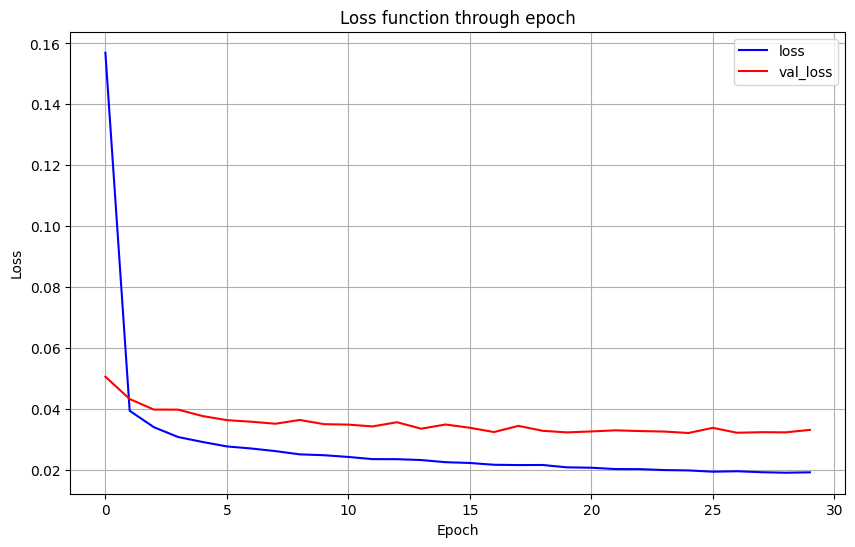

In [22]:
# we can try to perform some plots
plt.figure(figsize=(10,6))
plt.plot(history_model_user1.history['loss'],color='blue',label='loss')
plt.plot(history_model_user1.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

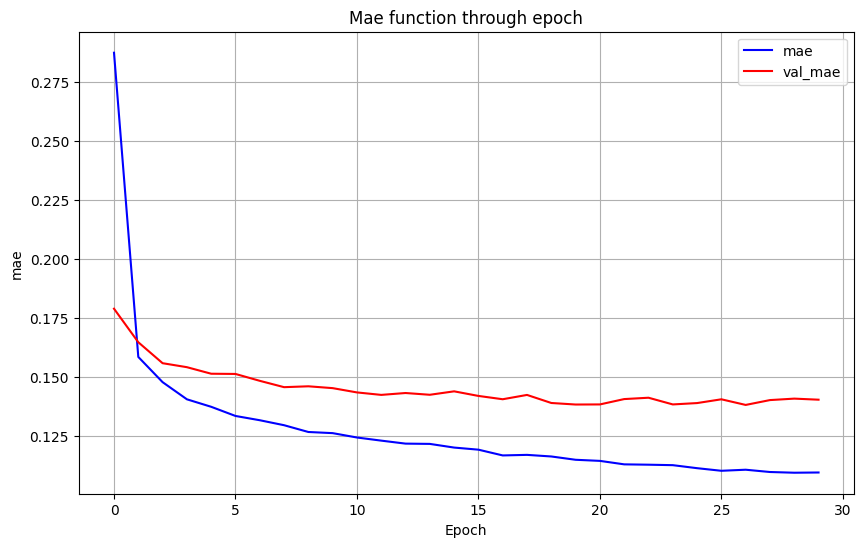

In [23]:
plt.figure(figsize=(10,6))
plt.plot(history_model_user1.history['mae'],color='blue',label='mae')
plt.plot(history_model_user1.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('Mae function through epoch')
plt.grid()
plt.legend()
plt.show()

In [24]:
print(history_model_user1.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [25]:
# keras.utils.plot_model( model, show_shapes=True)
#keras.utils.plot_model(model_user1,show_shapes=True)

# non mi plotta nulla --> da rivedere perchè non avevo pacchetto installato 

In [26]:
# now we can evaluate the test data

test_loss, test_mae = model_user1.evaluate(x_test,y_test,verbose=1)

test_loss,test_mae

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0293 - mae: 0.1329 


(0.030022699385881424, 0.1366521716117859)

Now we have to try to predict the possible valence (y_hat)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


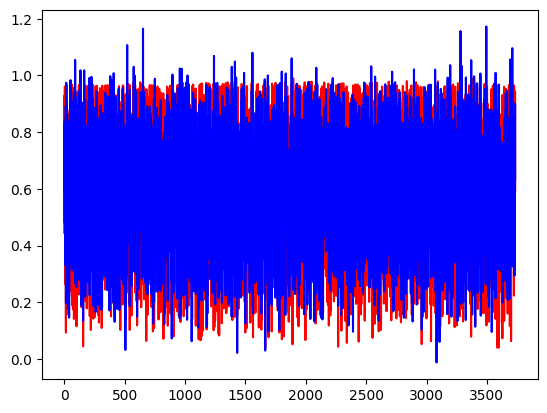

In [27]:
yhat = model_user1.predict(x_train) #DA RIVEDERE!!!!
plt.plot(y_train, color='r')
plt.plot(yhat, color='b') #attenzione alcune predizione sono negative
plt.show()

### END of OUR TEST

What we notice:

1) Important to check for the correlation, in order to understand if all the features that we consider for the NN beside are relevant 

2) Mybe the numbers of the intial neurons are to high since we see that the loss and the mae after only five epoch are almost constant 

3) We want to automatize the process, in order to avoid to define each df for each user and appy for each a diffrent model

---

# UPDATE 

1) Check for the correlation 

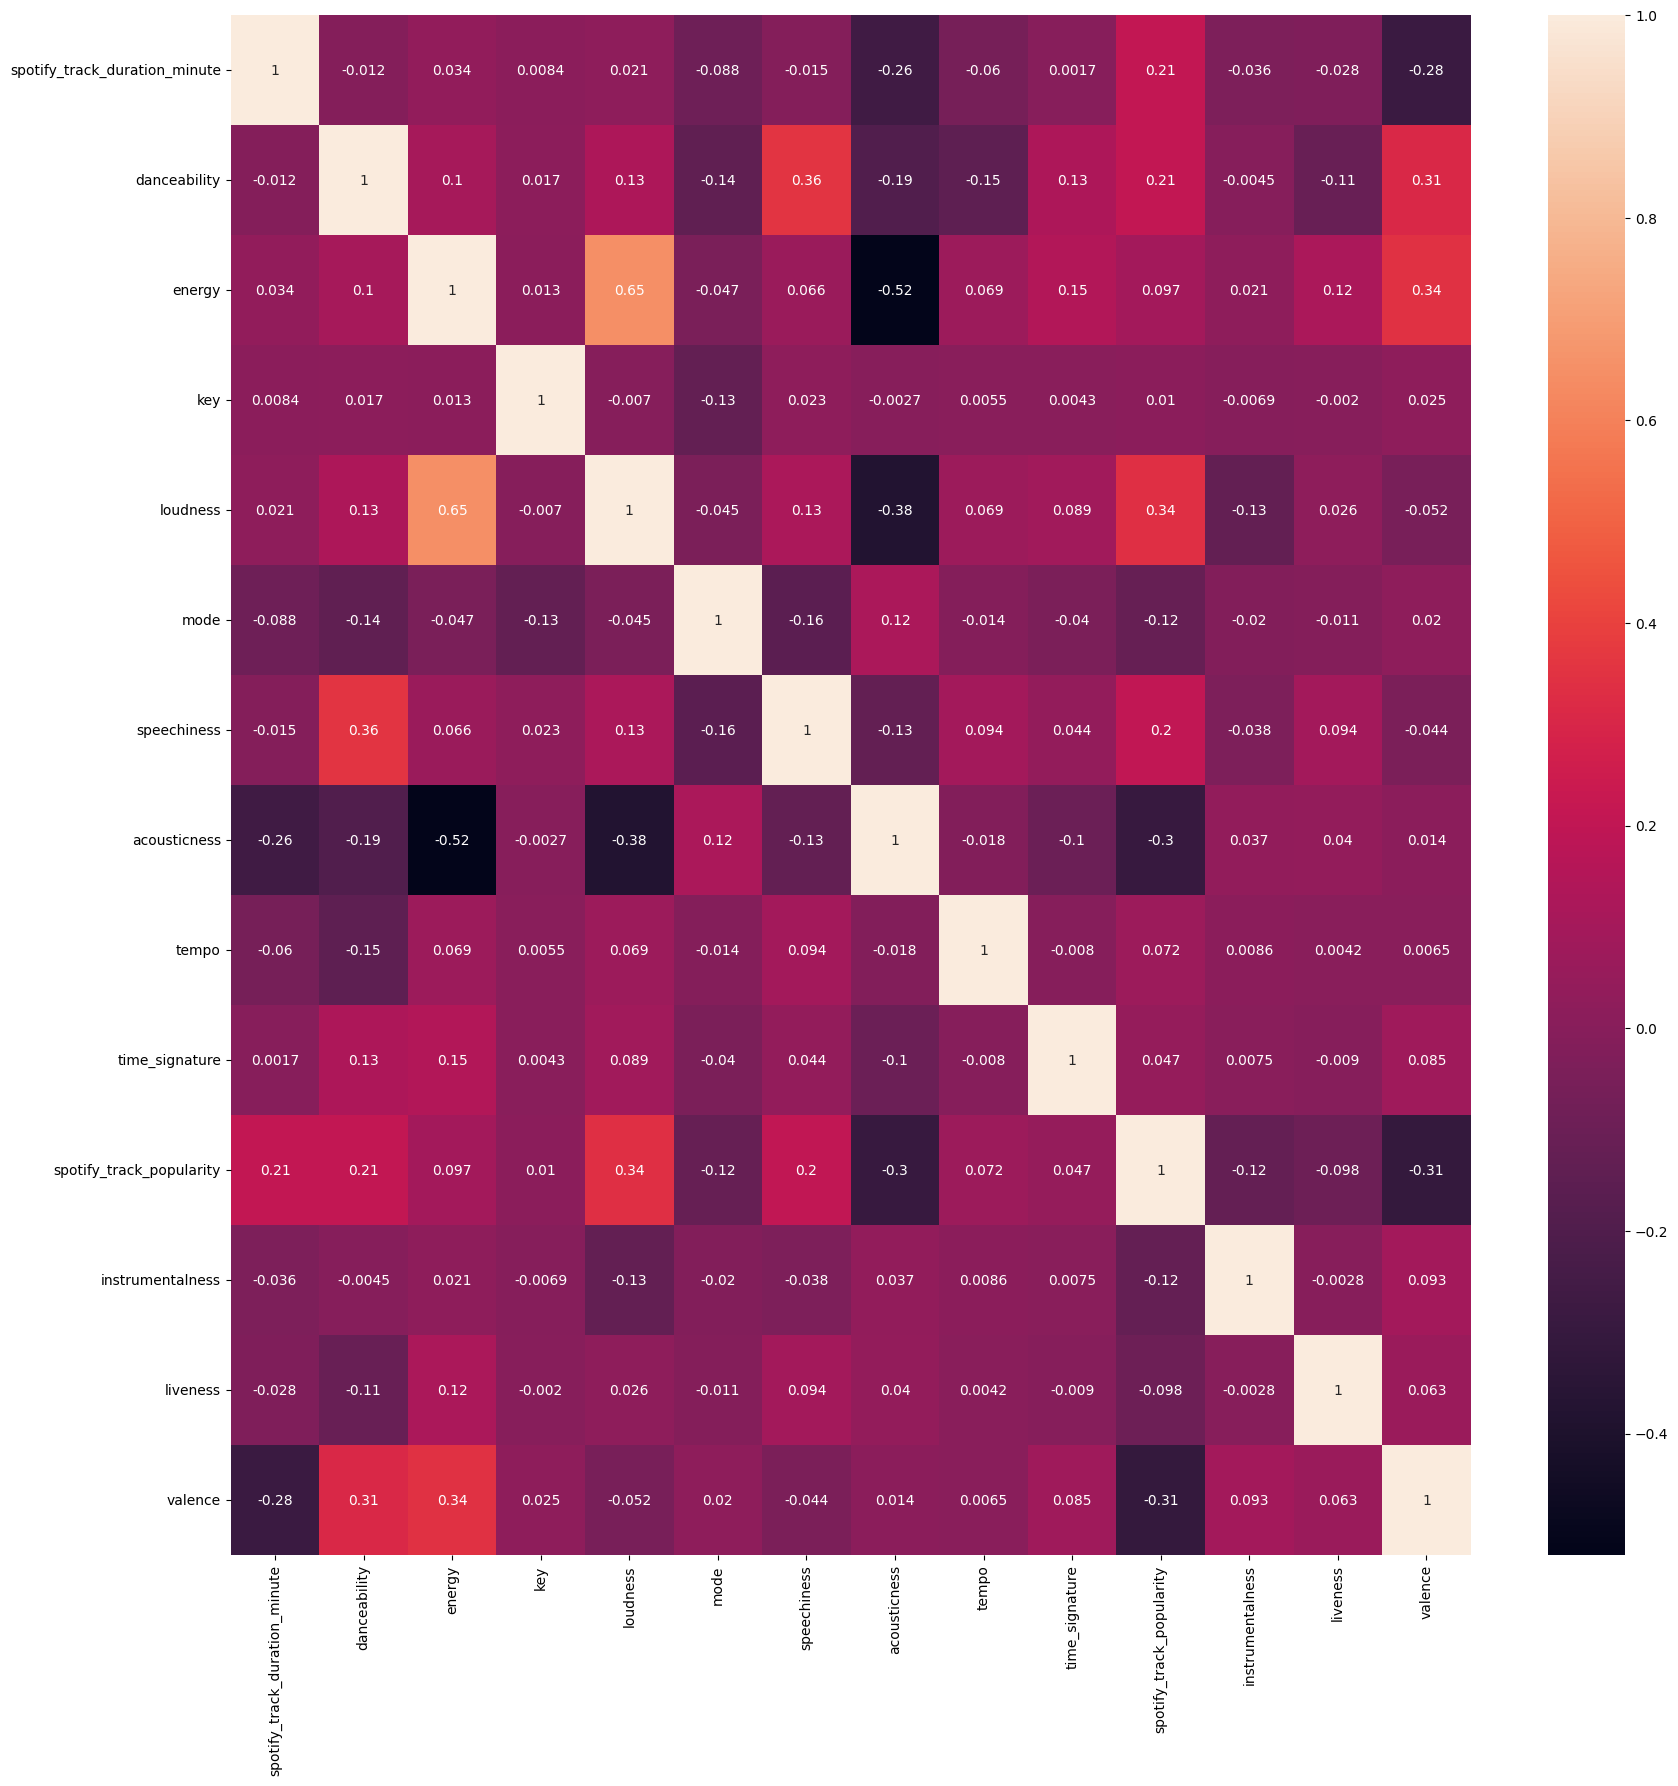

In [28]:
#i want to check possible correlation
plt.figure(figsize=(20,20))
sns.heatmap(user1_df[['spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness', 'valence']].corr(), annot= True)
plt.show()

We can notice that:

-   key is a useless 
-   tempo is a useless 
-   time signature is a useless 
-   spotify track popularity, we can se that is negative correlated with valence; it is positive correlated with loudness (BOTH INTERESTING)

So we can delite what are not usfull for our analysis

We redefine the list of feature delating the one that are useless 

We convert the maingenere in a integer value (we want try to use it for improve our NN)

--> da capire se una feature che era originariamente QUALITATIVA che convertiamo in NUMERICA 
possa effettivamente dare informazioni aggiuntive alla nostra NN (se si considera la sua frequenza può avere senso)

In [29]:
#first thing to do convert the maingenere in integer
#the idea consist to use the merge df qith value count on the maingenere and use the index
maing = merge_unique_df['maingenere'].value_counts()
dizio_main = {}
for index_maing in range(0,len(maing.index)): #value to indicate the genere
    dizio_main[maing.index[index_maing]] = index_maing
   #print(index_maing)


print(dizio_main)
#codifica dei maingeneri
merge_unique_numain_df = merge_unique_df.copy()
#rplace
merge_unique_numain_df['maingenere'].replace(dizio_main, inplace=True)
display(merge_unique_numain_df.head(3))

{'pop': 0, 'rock': 1, 'other': 2, 'soul': 3, 'rap': 4, 'country': 5, 'disco': 6, 'jazz': 7, 'blues': 8, 'funk': 9, 'dance': 10, 'metal': 11, 'folk': 12, 'house': 13, 'indie': 14, 'r&b': 15, 'latin': 16}


C:\Users\elped\AppData\Local\Temp\ipykernel_15184\1201508369.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_unique_numain_df['maingenere'].replace(dizio_main, inplace=True)
C:\Users\elped\AppData\Local\Temp\ipykernel_15184\1201508369.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.590,0.570,5.37,-9.970,...,0.0700,0.400,0.080000,0.200,0.63,117.760,3.89,22.16,2,2
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],3.43,unknown,single,0.590,0.570,5.37,-9.970,...,0.0700,0.400,0.080000,0.200,0.63,117.760,3.89,22.16,2,2
......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",2.77,False,The Essential Andy Williams,0.154,0.185,5.00,-14.063,...,0.0315,0.911,0.000267,0.112,0.15,83.969,4.00,38.00,0,3


# AUTOMATIZE THE PROCESS + change the n. of initial neurons 

## 2) - 3)

### Our new feature

In [30]:
#now we remove the useless feature and add maingenere codified
new_feature=[    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness', 'maingenere'
    'spotify_track_popularity', 'instrumentalness', 'liveness']
# now we have to define our TARGET (what we are interested in) --> OUTPUT
new_target='valence'

IDEA:

make a loop for create the 5 df, one for each user + NN model for each df

In [31]:
merge_unique_numain_df['User'].unique()

array([2, 3, 0, 4, 1])

## PLOT

interesting plots for visualize the output of our model

In [32]:
def plot_for_model(history):

    #plot loss
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'],color='blue',label='loss')
    plt.plot(history.history['val_loss'],color='red',label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss function through epoch')
    plt.legend()
    plt.grid()
    plt.show()

    #plot mean
    plt.figure(figsize=(10,6))
    plt.plot(history.history['mae'],color='blue',label='mae')
    plt.plot(history.history['val_mae'],color='red',label='val_mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.title('Mae function through epoch')
    plt.grid()
    plt.legend()
    plt.show()   

## MODEL

In [33]:
# function to create the model
def create_model_user(shape_x_train): #number of columns -> shape
    
    
    model_user_i = Sequential([
        Dense(32, input_dim=shape_x_train, activation='relu', name='first_layer'),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        

        Dense(16, activation='relu', name='secod_layer'),
        Dense(1, activation='linear', name='final_layer')
    ])

    #compile the model
    model_user_i.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    #summary
    #display(model_user_i.summary())

    #return  the model
    return model_user_i
    

## FIT MODEL

In [34]:
#function to train the model
def fit_model(model, x_train, y_train, x_test, y_test):

    history_model = model.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )

    return history_model

## MAIN

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2755 - mae: 0.3377 - val_loss: 0.0648 - val_mae: 0.2047
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0595 - mae: 0.1937 - val_loss: 0.0483 - val_mae: 0.1790
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0439 - mae: 0.1673 - val_loss: 0.0394 - val_mae: 0.1620
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0368 - mae: 0.1530 - val_loss: 0.0382 - val_mae: 0.1599
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356 - mae: 0.1500 - val_loss: 0.0352 - val_mae: 0.1530
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0335 - mae: 0.1467 - val_loss: 0.0338 - val_mae: 0.1495
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331 - mae: 0.1447 - val_loss: 0.0335 - val_mae: 0.1478
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 - mae: 0.1407 - val_loss: 0.0326 - val_mae: 0.1465
Epoch 9/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297 

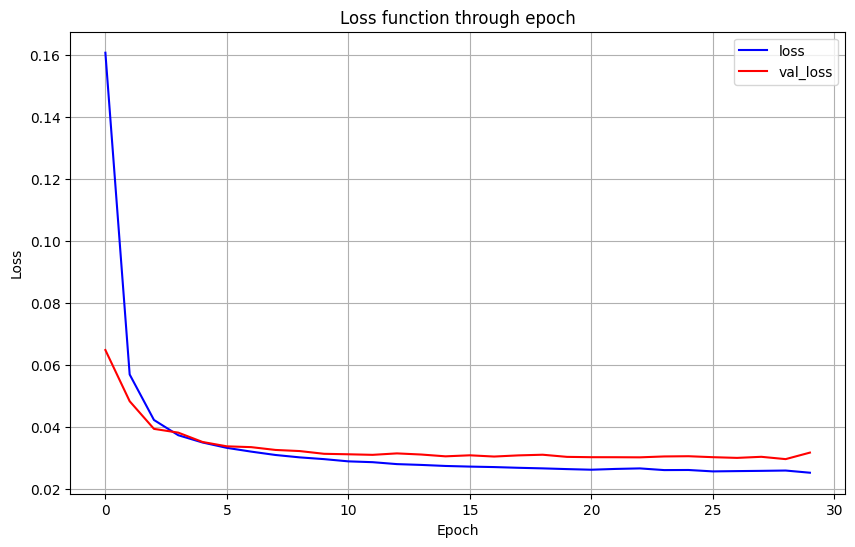

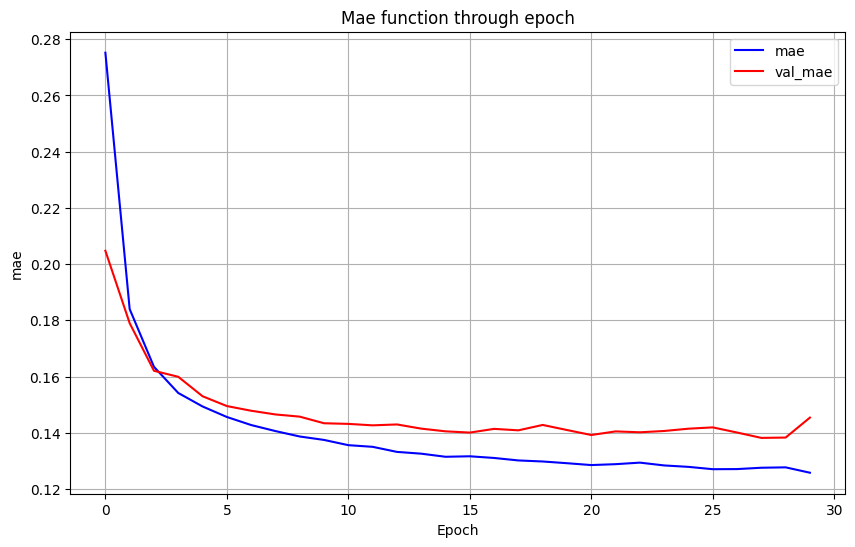

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4682 - mae: 0.4722 - val_loss: 0.0767 - val_mae: 0.2185
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0694 - mae: 0.2078 - val_loss: 0.0574 - val_mae: 0.1898
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0523 - mae: 0.1792 - val_loss: 0.0475 - val_mae: 0.1721
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0423 - mae: 0.1654 - val_loss: 0.0421 - val_mae: 0.1622
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0391 - mae: 0.1577 - val_loss: 0.0390 - val_mae: 0.1569
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 - mae: 0.1470 - val_loss: 0.0372 - val_mae: 0.1537
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0341 - mae: 0.1471 - val_loss: 0.0352 - val_mae: 0.1495
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0323 - mae: 0.1431 - val_loss: 0.0347 - val_mae: 0.1482
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0314 

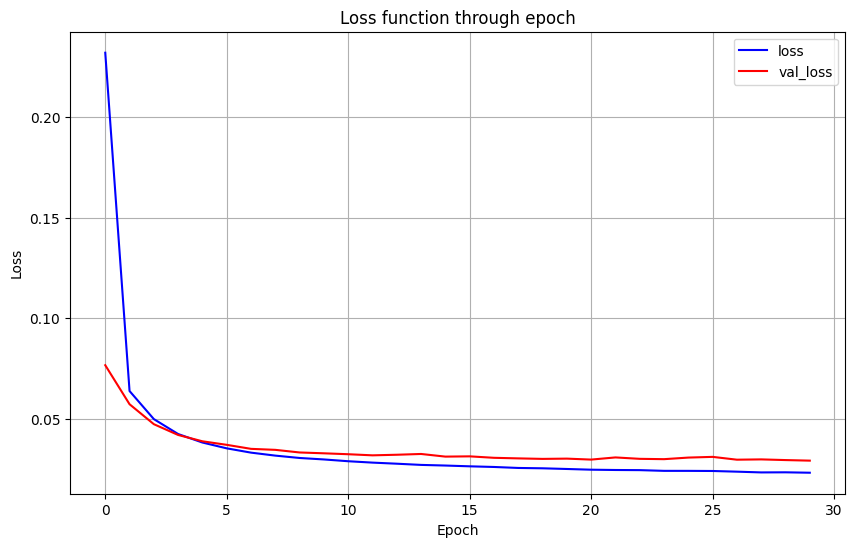

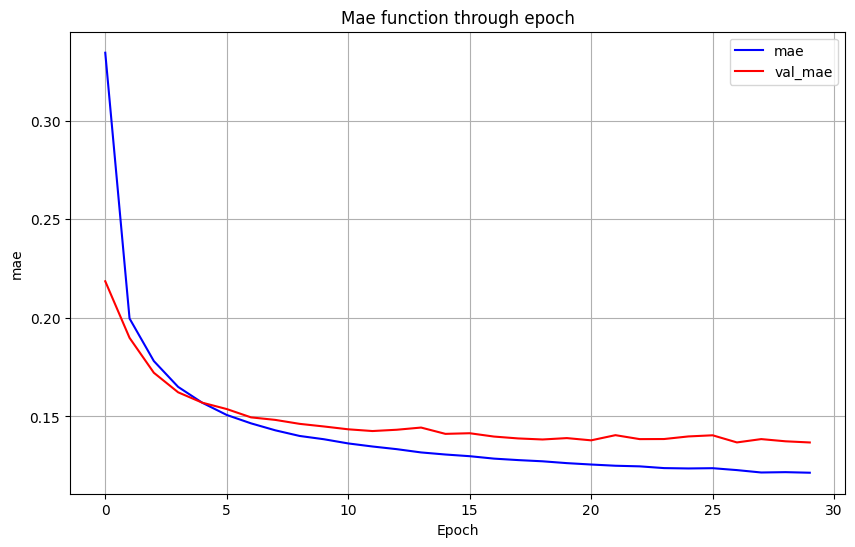

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2454 - mae: 0.3821 - val_loss: 0.0414 - val_mae: 0.1524
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0360 - mae: 0.1377 - val_loss: 0.0299 - val_mae: 0.1194
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0272 - mae: 0.1138 - val_loss: 0.0249 - val_mae: 0.1114
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0241 - mae: 0.1082 - val_loss: 0.0226 - val_mae: 0.1052
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0216 - mae: 0.1012 - val_loss: 0.0215 - val_mae: 0.1027
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0220 - mae: 0.1027 - val_loss: 0.0225 - val_mae: 0.1045
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0202 - mae: 0.0980 - val_loss: 0.0215 - val_mae: 0.1004
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196 - mae: 0.0961 - val_loss: 0.0203 - val_mae: 0.0980
Epoch 9/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193 

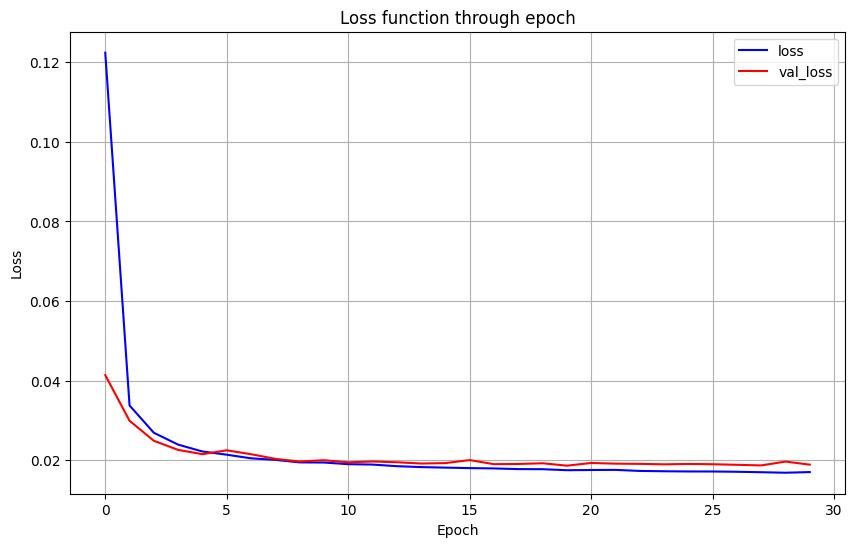

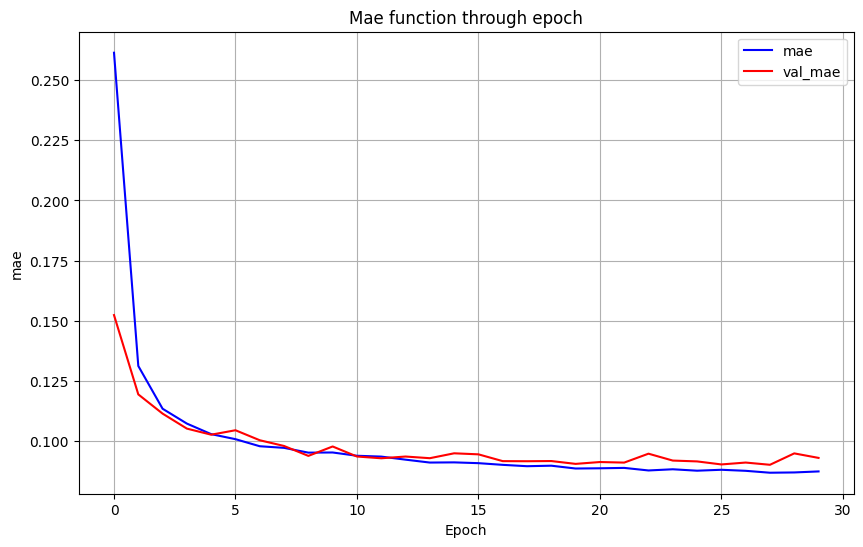

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4275 - mae: 0.4916 - val_loss: 0.0683 - val_mae: 0.2059
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0626 - mae: 0.1963 - val_loss: 0.0538 - val_mae: 0.1832
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0480 - mae: 0.1728 - val_loss: 0.0468 - val_mae: 0.1703
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0423 - mae: 0.1614 - val_loss: 0.0409 - val_mae: 0.1586
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0383 - mae: 0.1537 - val_loss: 0.0390 - val_mae: 0.1543
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - mae: 0.1466 - val_loss: 0.0372 - val_mae: 0.1508
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0338 - mae: 0.1458 - val_loss: 0.0361 - val_mae: 0.1476
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0333 - mae: 0.1443 - val_loss: 0.0345 - val_mae: 0.1469
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0316 - mae: 0.1410 - va

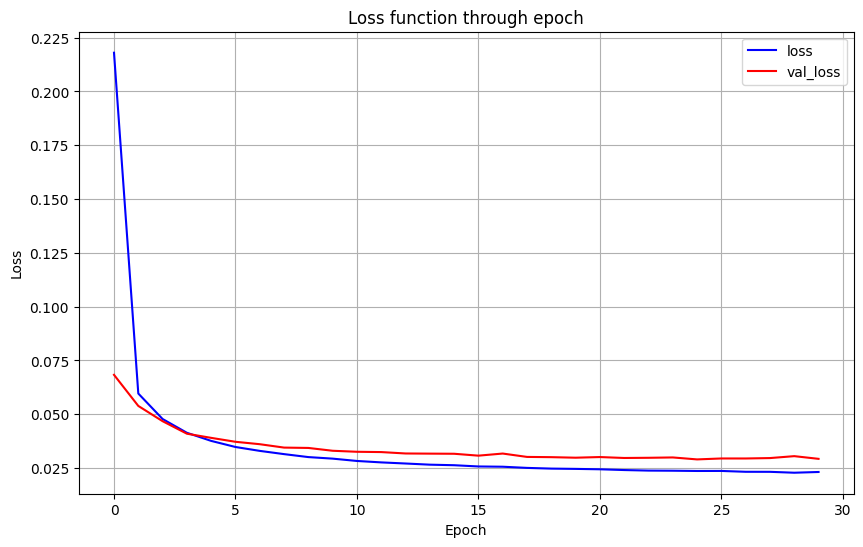

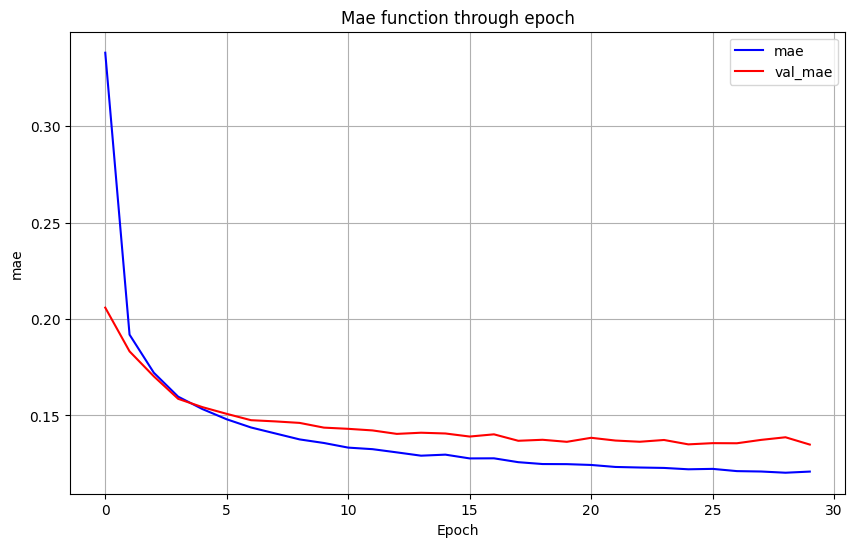

Epoch 1/30


c:\Users\elped\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7490 - mae: 0.6919 - val_loss: 0.1305 - val_mae: 0.2896
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1054 - mae: 0.2613 - val_loss: 0.0844 - val_mae: 0.2294
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0708 - mae: 0.2107 - val_loss: 0.0687 - val_mae: 0.2064
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0578 - mae: 0.1928 - val_loss: 0.0607 - val_mae: 0.1943
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0482 - mae: 0.1761 - val_loss: 0.0549 - val_mae: 0.1872
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0460 - mae: 0.1706 - val_loss: 0.0517 - val_mae: 0.1810
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0420 - mae: 0.1623 - val_loss: 0.0498 - val_mae: 0.1781
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0384 - mae: 0.1581 - val_loss: 0.0472 - val_mae: 0.1738
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0370 - mae: 0.1545 - va

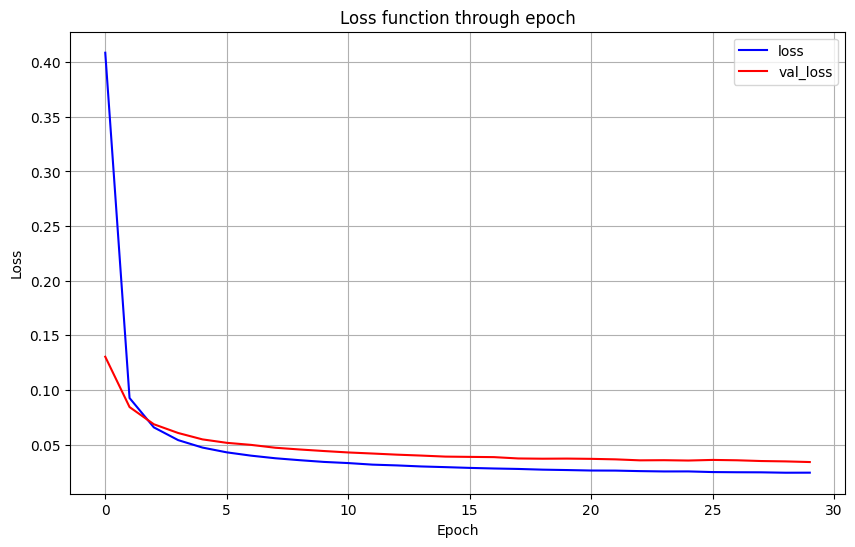

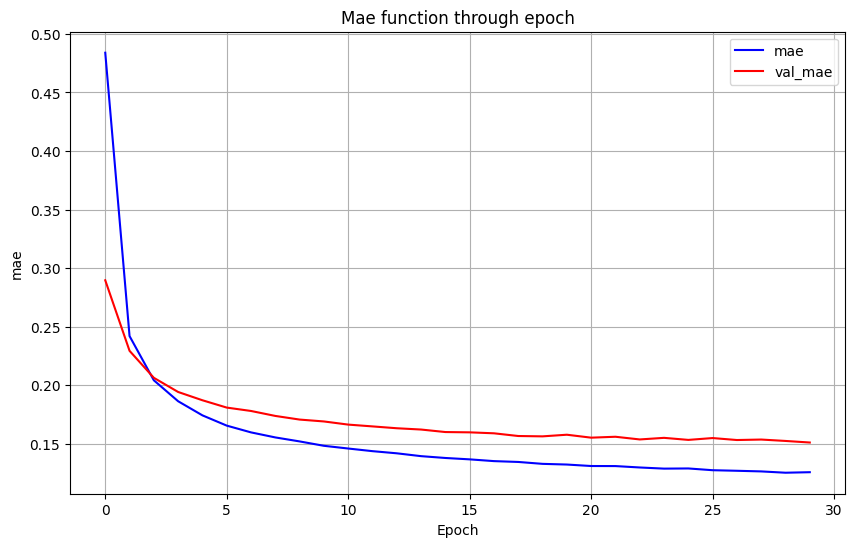

In [35]:
dizio_model_user = {} #in this dizio we store the model for each user


#loop creation user and model
for i in range(0, len(merge_unique_numain_df['User'].unique())): #i indica lo user   

    #select user
    mask_user = merge_unique_numain_df['User'] == i
    #display(mask_user)
    user_i_df = merge_unique_numain_df[mask_user]
    #display(user_i_df) 

    #extract the feature and target
    x = user_i_df[feature]
    y = user_i_df[target]

    #normalization
    x_scaled = StandardScaler().fit_transform(x)

    #split; serve farlo? non se ne occupa il fit? chiedere
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

    #conversion
    y_train=np.array(y_train)
    y_test=np.array(y_test)

    #creation model for the specific user
    model_user_i = create_model_user(x_train.shape[1])
    
    #fit the model with the different x, y train (for different user)
    history_model_user_i = fit_model(model_user_i, x_train, y_train, x_test, y_test)

    #plot the metrics of the model
    print('---------------------------------------------------------')
    print(f'USER {i}')
    plot_for_model(history_model_user_i)

    #save the model in the dictionary
    dizio_model_user[f"User{i}"] = {'model_user_i' : model_user_i,
                                    'history_model_user_i': history_model_user_i,
                                    'x_train': x_train,
                                    'x_test': x_test,
                                    'y_train': y_train,
                                    'y_test': y_test}

    

## TEST DIZIONARIO MODELLI PER USER

In [36]:
dizio_model_user['User0']['model_user_i'].summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ secod_layer (Dense)             │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_layer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,981 (11.65 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,988 (7.77 KB)

# DOMANDE / CONSIDERAZIONI
1)   ABBIAMO VISTO CHE DAL MODELLO_0_IDEA dove avevamo inizializzato primo LAYER 64 neuroni, secondo LAYER 32 neuroni e ultimo layer 1 neurone 
    otteniamo che dopo 5 epoche smettavamo di imparare, lo vediamo dal fatto che mae_val rimaneva pressonchè costante  

    --> riducendo il numero di neuroni (32, 16, 1) notiamo che il modello migliora notevolmete, l'apprendimento sembra essere continuo 

    VOGLIAMO QUINDI CAPIRE SE ABBIAMO UNA LINEA GUIDA PER GESTIRE IL NUMERO DI NEURONI O ANDIAMO A TENTATIVI COME ABBIAMO FATTO

2) Abbiamo trasformato la colonna maingenere in una colonna numerica (pop:0, other: 1, ecc..)
    DOMANDA: questa nuova variabile è davvero utile al modello?

    dal mio punto di vista essendo una conversione di una variabile qualitativa in una quantitativa, non fornisce iniformazioni agginitive se non per la frequenza con cui un determinato genere appare in un cluster



In [37]:
%store merge_unique_df

Stored 'merge_unique_df' (DataFrame)


In [38]:
%store merge_unique_numain_df

Stored 'merge_unique_numain_df' (DataFrame)


In [39]:
%store dizio_main

Stored 'dizio_main' (dict)
